In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import timestamp, YEAR
from utils.arrayview import ArrayView, TimeseriesView

from prediction.models.fit_model import TSModel
from prediction.models.model_parameters import ModelParameters
from prediction.models.factor_management import FactorList
from prediction.models.preprocessing import load_slices, print_factor_order

from prediction.models.prediction import factornames_trimmed
from prediction.models.parameters import factor_build_end
from prediction.tools.plotting import varinfo

In [2]:
av = ArrayView.from_file('../datadev/brain_final2cut.av.bcolz')
tsav = load_slices(path='../datadev/')

In [3]:
fac = "ClassDiff.WinsAverage"
arr = pd.read_csv("../ukhr_avs/" + fac + ".csv", header=None).values.flatten()
arr[arr == 0] = np.nan
print(np.unique(arr))
av[fac] = arr
factornames_trimmed += [fac]

[ 65.6  66.8  67.2 ...,   nan   nan   nan]


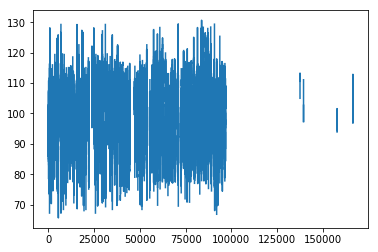

Variable info
--------------------------------------
Length: 1631851
Number of NaN's: 1622414  (99.42%)
Number of Inf's: 0  (0.00%)
Number of zeros: 0  (0.00%)
Number of unique's: 1229
Mean: 98.56
Std: 10.07
Skewness: -0.31
Kurtosis: -0.07
Min and max values: 65.60 to 130.70
--------------------------------------


prediction/tools/plotting.py:25: RuntimeWarning: invalid value encountered in less
  print 'Number of zeros: %s  (%4.2f%%)' % (np.sum(abs(x) < 1e-10), np.mean(abs(x) < 1e-10) * 100)


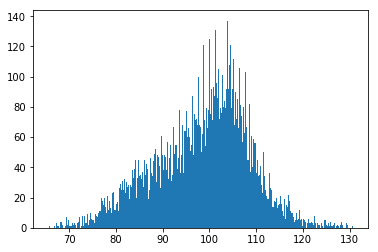

(nan, nan)

In [4]:
plt.plot(range(len(av[fac])), av[fac])
plt.show()
varinfo(av[fac])

In [5]:
pars = ModelParameters(av, oos_start=factor_build_end+YEAR, depth=3, lmbd=10, verbose=True)
fl = FactorList(av, factornames_trimmed)
fl.preprocess(pars)
factors = fl.asmatrix()

INFO:models:Getting factors from av and rescaling...


.

 .

 .

 .

 .

INFO:models:Filling in missing values...


INFO:models:Computing each factor as linear combination of all the others...


 .

 .

 .

 .

 .

INFO:models:Number of missing patterns: 8367


 .

 .

 .

 .

 .

 .

 .

 .

In [6]:
tsmod = TSModel(factors, tsav, pars)
tsmod.fit_slices()

INFO:models:Fitting slice 0


prediction/models/fit_model.py:153: RuntimeWarning: divide by zero encountered in log
  stats, self.step2probs[sl] = self.concat_and_fit(strata, result, nonrunner, [fback, flay, np.log(probs)], ts_idx, valid2, verbose=False, step=2)


INFO:models:Fitting slice 1


INFO:models:Fitting slice 2


INFO:models:Fitting slice 3


INFO:models:Fitting slice 4


INFO:models:Fitting slice 5


INFO:models:Fitting slice 6


INFO:models:Fitting slice 7


INFO:models:Fitting slice 8


INFO:models:Fitting slice 9


In [7]:
tsmod.stats1.ll

array([[-1829.278 , -1829.278 , -2086.1688],
       [-1834.8289, -1834.8289, -2074.0923],
       [-1840.0546, -1840.0546, -2059.8898],
       [-1843.8068, -1843.8068, -2040.5214],
       [-1861.3161, -1861.3161, -1993.4249],
       [-1879.0794, -1879.0794, -1967.2941],
       [-1915.2155, -1915.2155, -1920.786 ],
       [-1929.7125, -1929.7125, -1896.3779],
       [-1932.2435, -1932.2435, -1893.4748],
       [-1936.6391, -1936.6391, -1880.5684],
       [       nan,        nan,        nan]])

In [8]:
tsmod.stats2.ll

array([[-1818.3394, -2101.3476, -2101.3476],
       [-1823.8935, -2089.2702, -2089.2702],
       [-1829.2242, -2074.1385, -2074.1385],
       [-1832.6561, -2053.2276, -2053.2276],
       [-1850.5556, -1999.6594, -1999.6594],
       [-1868.5072, -1966.3755, -1966.3755],
       [-1904.2358, -1913.0004, -1913.0004],
       [-1919.3328, -1880.3336, -1880.3336],
       [-1922.086 , -1877.1291, -1877.1291],
       [-1927.0032, -1864.3741, -1864.3741],
       [       nan,        nan,        nan]])

In [9]:
print_factor_order(tsmod.stats1, factornames_trimmed)

  0:                                                              zec0c22a48    t-score sum: 87.74
  1:                                                              z245159235    t-score sum: 55.72
  2:                                                              z5981b9f89    t-score sum: 55.04
  3:                                                              zb87666d6d    t-score sum: 47.36
  4:                                                              z027f9f0f5    t-score sum: 46.53
  5:                                                              z34b78e584    t-score sum: 44.20
  6:                                                              ze4c91eac0    t-score sum: 44.17
  7:                                                              zc31456152    t-score sum: 40.42
  8:                                                              z6809c316d    t-score sum: 38.99
  9:                                                              z2a6963635    t-score sum: 35.94
 10:      

In [10]:
tsmod.write_simdata('simdata.p')